<a href="https://colab.research.google.com/github/mauriciodev/spatialgeodesy/blob/main/exercises/spatialgeodesy_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing useful packages

In [3]:
!pip install --upgrade pip
!pip install git+https://github.com/geospace-code/georinex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/geospace-code/georinex to /tmp/pip-req-build-4l317agz
  Running command git clone --filter=blob:none --quiet https://github.com/geospace-code/georinex /tmp/pip-req-build-4l317agz
  Resolved https://github.com/geospace-code/georinex to commit c689a5a6bc2ffb68bc055f150f1da1b6bab12812
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 893.2/893.2 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.9/877.9 kB 64.3 MB/s eta 0:00:00
  Created wheel for georinex: filename=georinex-1.16.1-py3-none-any.whl size=58986 sha256=872bfc59d085c86944e425d86f72fab05369d136273fc9e7d164748aa970954f
  Stored in directory: /tmp/pip-ephem-

# Dependencies

In [4]:
#Python standard libraries
import os #File path operations.
import shutil #Shell operations. Unzipping, moving files, etc.
import urllib.request #Downloader.

#External libraries
import numpy as np #Numeric Python.
import erfa #Essential Routines for Fundamental Astronomy.
import pandas as pd #Python Data Analysis Library.
import matplotlib.pyplot as plt #Plots.
import georinex #RINEX files reader.
import xarray as xa #Multi dimension arrays. For georinex.


# Examples

## Downloading a file

In [5]:
link="https://geoftp.ibge.gov.br/informacoes_sobre_posicionamento_geodesico/rbmc/dados/2022/001/onrj0011.zip" #link to the file to be downloaded
zipFile=link.split("/")[-1] #name that will be used to save the file on the local drive
local_filename, headers = urllib.request.urlretrieve(link, zipFile) #download the file saving as the name in zipFile
shutil.unpack_archive(local_filename) #extrating files from the zip file
os.listdir() #list current directory

['.config',
 'onrj0011.22n',
 'georinex',
 'onrj0011.22g',
 'onrj0011.zip',
 'onrj0011.22d',
 'sample_data']

## Opening the RINEX file with GeoRinex

In [6]:
#we are using rinex 2 because georinex is incredibly slow for rinex 3 currently.
obsFile="onrj0011.22d" #Observation RINEX file that we downloaded on the previous section. It's a multi GNSS file!
obsData=georinex.load(obsFile,use='G')
obsData
     


<xarray.Dataset>
Dimensions:  (time: 5760, sv: 31)
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 ... 2022-01-01T23:59:45
  * sv       (sv) <U3 'G01' 'G02' 'G03' 'G04' 'G05' ... 'G29' 'G30' 'G31' 'G32'
Data variables:
    L1       (time, sv) float64 1.127e+08 nan 1.078e+08 ... nan 1.329e+08 nan
    L2       (time, sv) float64 8.783e+07 nan 8.403e+07 ... nan 1.036e+08 nan
    L5       (time, sv) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    C1       (time, sv) float64 2.145e+07 nan 2.052e+07 ... nan 2.529e+07 nan
    P1       (time, sv) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    C2       (time, sv) float64 2.145e+07 nan 2.052e+07 ... nan 2.529e+07 nan
    P2       (time, sv) float64 2.145e+07 nan 2.052e+07 ... nan 2.529e+07 nan
    C5       (time, sv) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    S1       (time, sv) float64 47.6 nan 52.3 48.8 nan ... nan nan nan 31.6 nan
    S2       (time, sv) float64 48.4 nan 52.1 48.6 nan ... nan nan nan 30.6 nan
    S5       (time, sv) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    version:          1.0
    interval:         15.0
    rinextype:        obs
    fast_processing:  1
    time_system:      GPS
    filename:         onrj0011.22d
    rxmodel:          TRIMBLE NETR8
    position:         [4283638.3579, -4026028.8217, -2466096.8361]

## Acessing the pseudorange of a SV

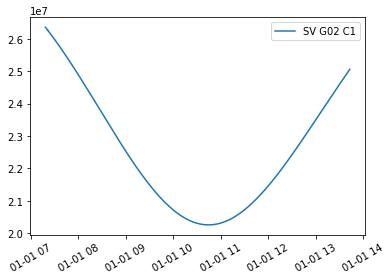

In [7]:
y=obsData.sel(sv='G02') #Selects only the data for that spatial vehicle (SV)
plt.plot(y.time,y.C1, label='SV G02 C1') #y.time is the sequence of timestamps. y.C1 represents the selected pseudorange (GPS band 1 pseudorange). 
plt.xticks(rotation=30) #Rotate the labels on xaxis
plt.legend() #Add a legend
plt.show() #Plot

## Reading a navigation file

In [8]:
#we are using rinex 2 because georinex is incredibly slow for rinex 3 currently.
navFile="onrj0011.22n" #Navigation RINEX file that we downloaded on the previous section.!
navData=georinex.load(navFile)
navData

<xarray.Dataset>
Dimensions:           (time: 31, sv: 32)
Coordinates:
  * time              (time) datetime64[ns] 2022-01-01 ... 2022-01-01T23:59:44
  * sv                (sv) <U3 'G01' 'G02' 'G03' 'G04' ... 'G30' 'G31' 'G32'
Data variables: (12/29)
    SVclockBias       (time, sv) float64 0.0004691 -0.0006474 ... -4.397e-05
    SVclockDrift      (time, sv) float64 -1e-11 -1.137e-12 ... -5.798e-12
    SVclockDriftRate  (time, sv) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan 0.0 0.0
    IODE              (time, sv) float64 39.0 41.0 38.0 222.0 ... nan 15.0 57.0
    Crs               (time, sv) float64 -141.1 -142.7 -59.75 ... -25.53 18.16
    DeltaN            (time, sv) float64 3.988e-09 4.556e-09 ... 4.741e-09
    ...                ...
    SVacc             (time, sv) float64 2.0 2.0 2.0 2.0 2.0 ... nan nan 2.0 2.0
    health            (time, sv) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan 0.0 0.0
    TGD               (time, sv) float64 5.122e-09 -1.77e-08 ... 4.657e-10
    IODC              (time, sv) float64 39.0 41.0 38.0 990.0 ... nan 15.0 57.0
    TransTime         (time, sv) float64 5.172e+05 5.112e+05 ... 6.014e+05
    FitIntvl          (time, sv) float64 4.0 4.0 4.0 4.0 4.0 ... nan nan 4.0 4.0
Attributes:
    version:    2.11
    svtype:     ['G']
    rinextype:  nav
    filename:   onrj0011.22n